# projet 6 Détectez des faux Billets

In [1]:
import pandas as pd
from functions import *
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage,fcluster
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from pylab import rcParams
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from scipy.cluster import hierarchy
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import validation_curve
from yellowbrick.cluster import KElbowVisualizer

#### Mes missions

###### Mission 0
Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

###### Mission 1
Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

analyse de l'éboulis des valeurs propres ;
représentation des variables par le cercle des corrélations ;
représentation des individus par les plans factoriels ;
analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

###### Mission 2
Appliquez un algorithme de classification, puis analysez le résultat obtenu.

Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

###### Mission 3
Modélisez les données à l'aide d'une régression logistique. Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [2]:
# parametres des figures 
rcParams['figure.figsize'] = 15,15
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16

## Importation et nettoyage des données

In [3]:
#importation des données 
B= pd.read_csv('notes.csv')
B

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [4]:
# renomes les colonnes
Billet=B.rename(columns={"is_genuine":"Authentique","diagonal":"Diagonale","height_left":"hauteur_G","height_right":"hauteur_D","margin_low":"marge_bas","margin_up":"marge_h","length":"longueur"})
Billet

,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [5]:
# vérification des valeurs manquentes et types des variables 
Billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Authentique  170 non-null    bool   
 1   Diagonale    170 non-null    float64
 2   hauteur_G    170 non-null    float64
 3   hauteur_D    170 non-null    float64
 4   marge_bas    170 non-null    float64
 5   marge_h      170 non-null    float64
 6   longueur     170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


# mission 0

## Description statistique des données 

In [6]:
#description des données
Billet.describe().round(2)

,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
count,170.00,170.00,170.00,170.00,170.00,170.00
mean,171.94,104.07,103.93,4.61,3.17,112.57
std,0.31,0.30,0.33,0.70,0.24,0.92
min,171.04,103.23,103.14,3.54,2.27,109.97
25%,171.73,103.84,103.69,4.05,3.01,111.85
50%,171.94,104.06,103.95,4.45,3.17,112.84
75%,172.14,104.29,104.17,5.13,3.33,113.29
max,173.01,104.86,104.95,6.28,3.68,113.98


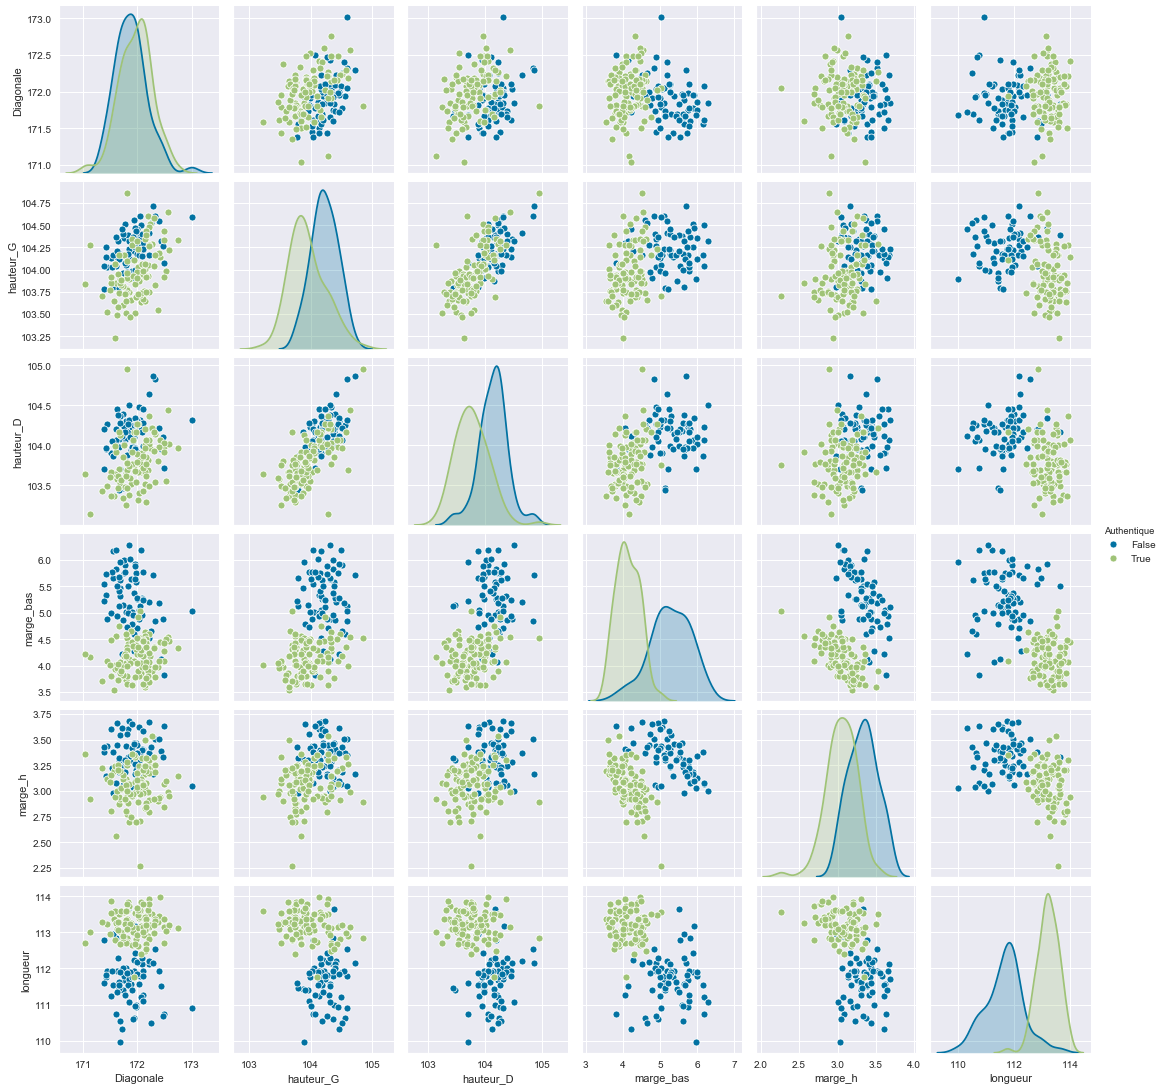

In [7]:
# preséntation graphiques univarie et bivaries
sns.pairplot(Billet,hue="Authentique")
plt.savefig("seaborn")

on voit sur la diagonale on les fonctions de densité conditionnaires qui nous permet de savoir l'impact de chaque variable pour l'authanticité de billets  et on voit ici que le diagonale et la longueur joue un rôle non négligeable pour l'authanticité de vrai billet et marge et longueur aussi joue un rôle .

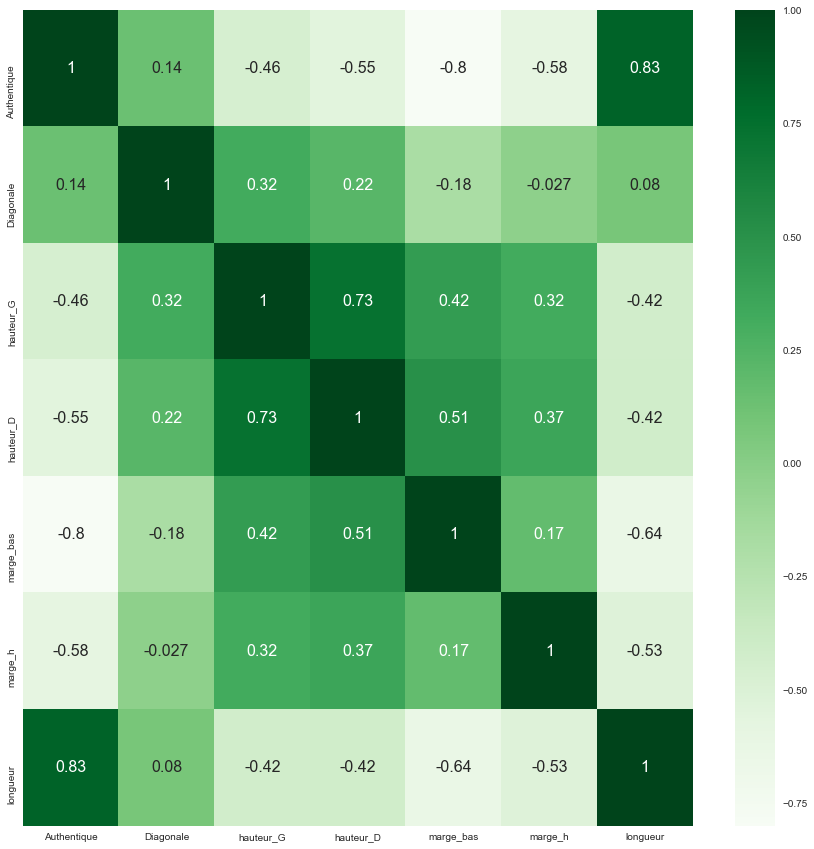

In [8]:
# matrice de corrélation
Billet_corr=Billet.corr()
sns.heatmap(Billet_corr,annot=True ,cmap="Greens")
plt.savefig("corrélation_map")
plt.show()

on a une corrélation de 0.83 entre authanticité et la longueur et il ya aucune corrélation entre longueur et diagonale ,sinon ailleurs il y a les corrélation negative entre variable .

In [9]:
#proportion de vrai et faux
vrai=Billet['Authentique'].value_counts()
prop =round(vrai/vrai.sum(),2)
prop

True     0.59
False    0.41
Name: Authentique, dtype: float64

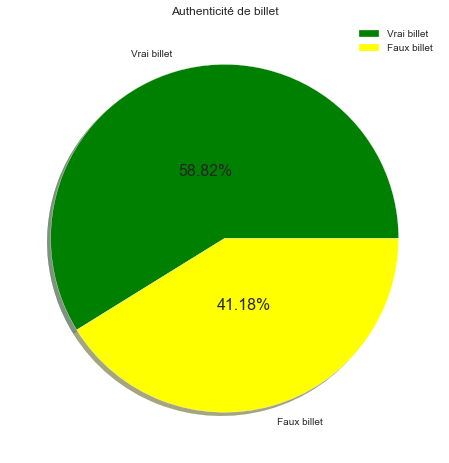

In [10]:
#visualisation d'authenticité  ratio vrai ,faux
plt.figure(figsize = (8, 8))
plt.pie(vrai, labels = ['Vrai billet', 'Faux billet'],
           colors = [ 'green', 'yellow'],
           explode = [0, 0],
           autopct = lambda sex: str(round(sex, 2)) + '%',
           pctdistance = 0.4, labeldistance = 1.1,
           shadow = True)
plt.savefig("pourcentage desvrai billets")
plt.title("Authenticité de billet")
plt.legend()

In [11]:
#mode de longueur
mode_l=Billet['longueur'].mode() # mode 
mode_l

0    113.38
dtype: float64

on ramarque que en generale moyenne la longueur est de 112.57 mm ,diagonale de 171.94 mm et la moitie des billets a une diagonale de plus 171.94 et une autre moitie a moins  alors que la moitie delongueur de billet est de plus de 112.84 une autre moins.
pour hauteur gauche la moyenne est de 104.07 mm.
pour hauteur droite la moyenne est de 103.93 mm.
pour marge bas la moyenne est de 4.61 mm.
pour marge h la moyenne est 3.17 mm.

In [12]:
#variance de longueur 
variance_l=Billet['longueur'].var()# variance 
variance_l

0.8546039714584058

In [13]:
#mode de diagonale
mode_d=Billet['Diagonale'].mode() # mode 
mode_d

0    172.1
dtype: float64

###### la majorité des billet ont une diagonale de 172 mm

In [14]:
# creation de'un dataframe qui contient que les vrai billet
Vrai=Billet[Billet["Authentique"]== True]
Vrai

,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
95,True,172.49,103.92,103.91,4.42,2.84,113.38
96,True,172.00,104.32,104.26,4.53,3.04,112.93
97,True,171.49,103.77,103.60,4.01,3.09,112.95
98,True,172.10,103.98,103.86,4.47,3.06,113.00


In [15]:
#decription statistique 
Vrai.describe()

,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


In [16]:
# creation de'un dataframe qui contient que les faux billet
Faux=Billet[Billet["Authentique"]== False]
Faux

,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
100,False,171.45,104.03,104.26,4.88,3.44,111.92
101,False,171.97,104.38,104.18,5.59,3.47,110.98
102,False,171.94,104.21,104.10,4.28,3.47,112.23
103,False,172.04,104.34,104.48,4.88,3.28,112.15
104,False,171.75,104.16,104.23,5.75,3.25,111.68
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [17]:
#description statistique
Faux.describe()

,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


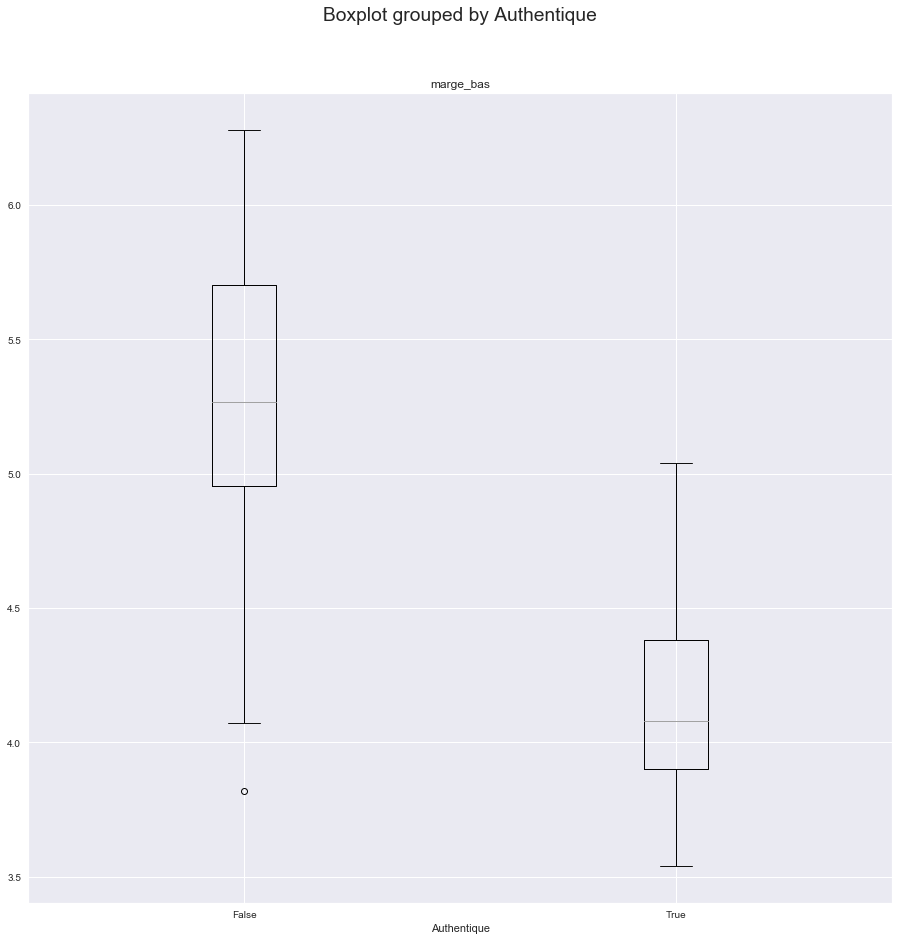

In [18]:
#boite de moustacheùarge bas 
Billet.boxplot(column='marge_bas',by='Authentique')

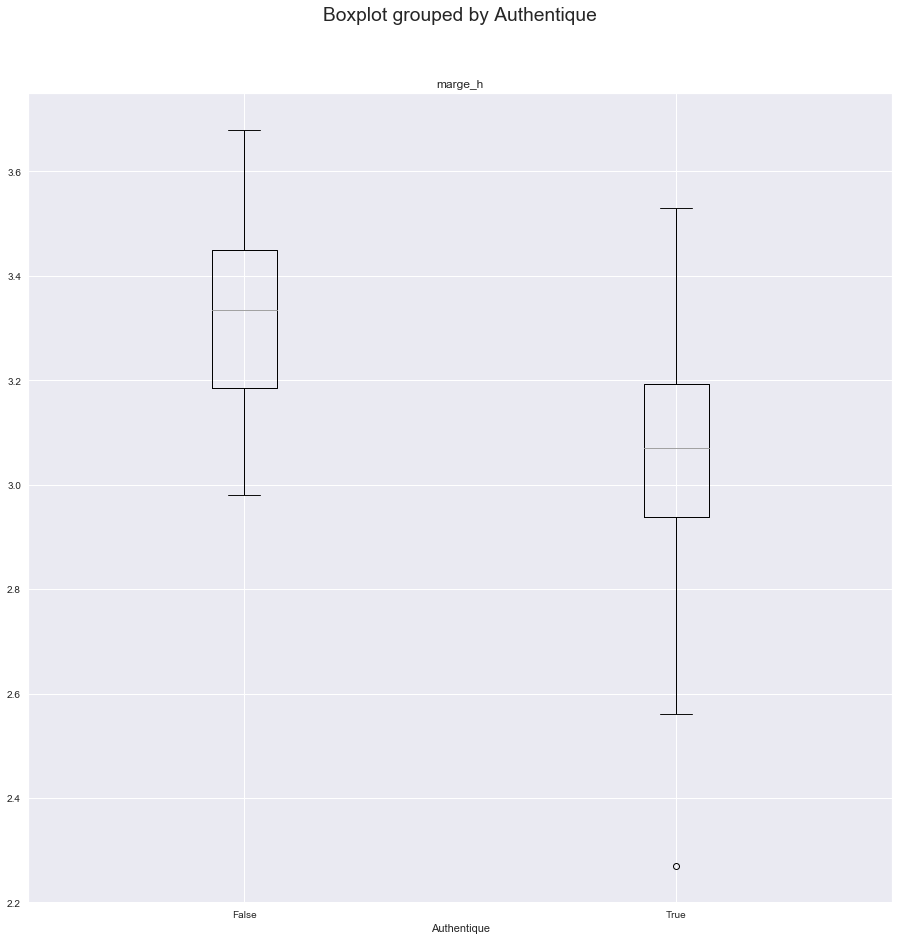

In [19]:
#boite de moustacheùarge haut
Billet.boxplot(column='marge_h',by='Authentique')

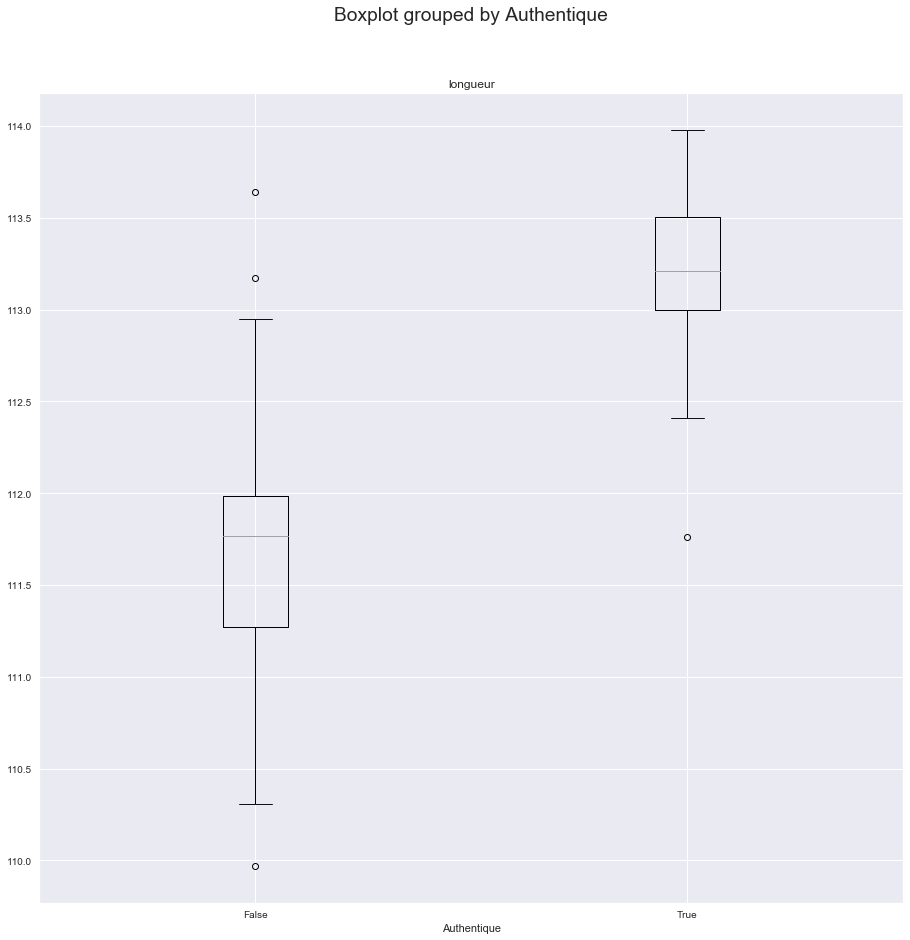

In [20]:
#boite de moustacheùarge longueur
Billet.boxplot(column='longueur',by='Authentique')

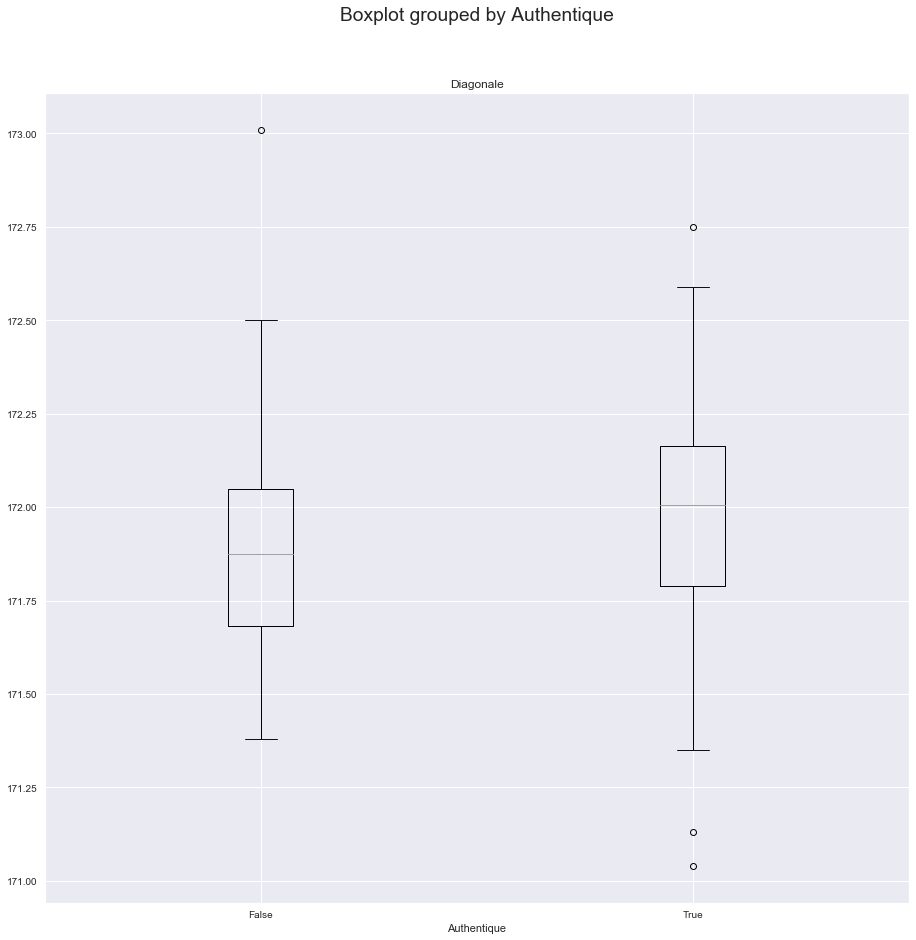

In [21]:
#boite de moustacheùarge diagonale
Billet.boxplot(column='Diagonale',by='Authentique')

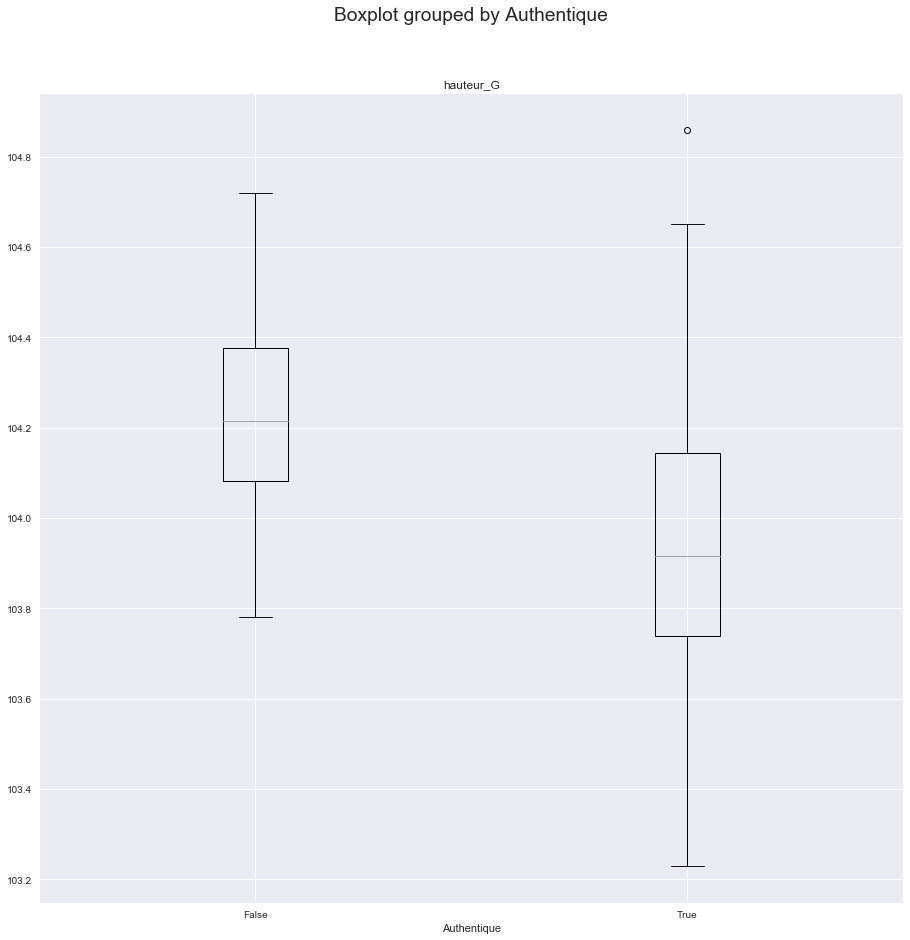

In [22]:
#boite de moustacheùarge hauteur gauche
Billet.boxplot(column='hauteur_G',by='Authentique')

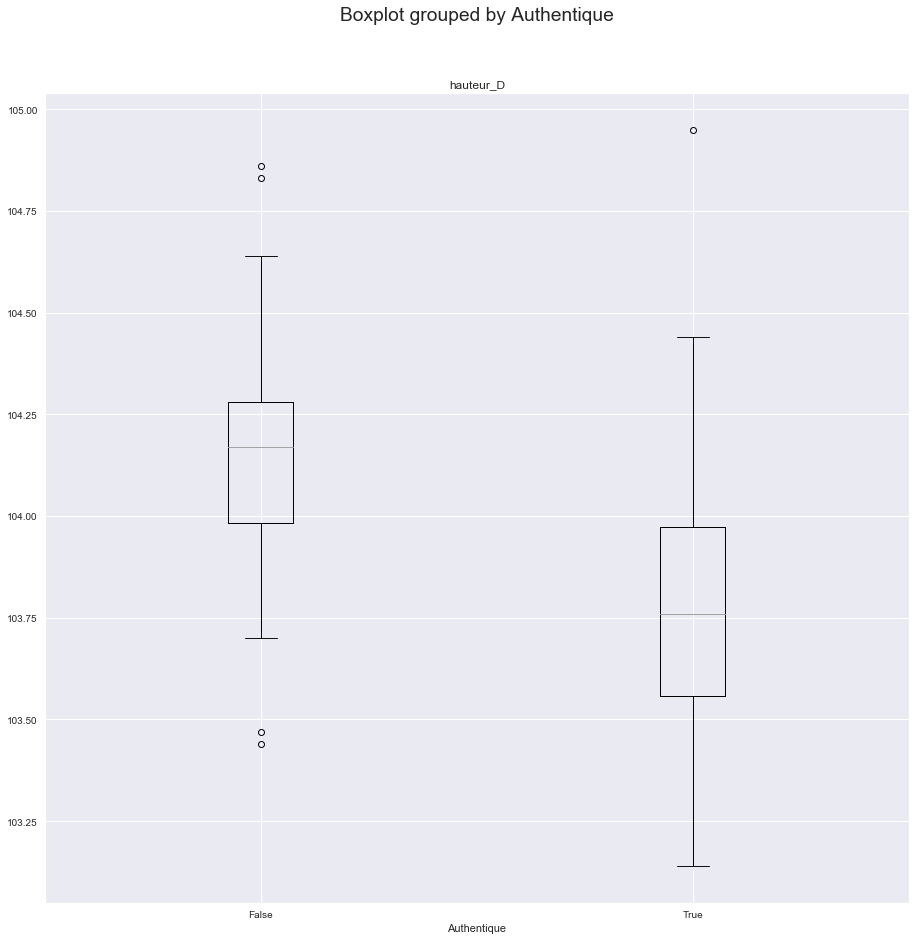

In [23]:
#boite de moustache hauteur droit 
Billet.boxplot(column='hauteur_D',by='Authentique')

In [24]:
# moyenne generale 
PK=Billet.groupby(by='Authentique').mean()
PK

,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
Authentique,,,,,,
False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


# Mission 1

## analyse en composantes principales(ACP)

In [25]:
#moyennes par variable
Billet.mean(axis=0)

Authentique      0.588235
Diagonale      171.940588
hauteur_G      104.066353
hauteur_D      103.928118
marge_bas        4.612118
marge_h          3.170412
longueur       112.570412
dtype: float64

In [26]:
#écarts-type par variable
Billet.std(axis=0)

Authentique    0.493607
Diagonale      0.305768
hauteur_G      0.298185
hauteur_D      0.330980
marge_bas      0.702103
marge_h        0.236361
longueur       0.924448
dtype: float64

In [27]:
#standardisation(centre et réduit)
Z = (Billet - Billet.mean(axis=0))/Billet.std(axis=0)
print(Z)

     Authentique  Diagonale  hauteur_G  hauteur_D  marge_bas   marge_h  \
0       0.834196  -0.427082   2.661591   3.087442  -0.131203 -1.186369   
1       0.834196  -0.884945  -1.094464  -0.689218  -0.857592 -1.270985   
2       0.834196  -0.361673  -1.027391  -0.507939  -0.302118 -1.228677   
3       0.834196  -0.459787  -0.960319  -0.840285  -1.256394 -0.213283   
4       0.834196   0.357826  -1.228609  -0.538152   0.609430 -3.809471   
..           ...        ...        ...        ...        ...       ...   
165    -1.191708   0.554053   0.548810   1.576778   0.894289  1.732890   
166    -1.191708   3.497457   1.756113   1.153792   0.609430 -0.509439   
167    -1.191708   1.731414   0.682955   0.519313   0.381543  0.675187   
168    -1.191708  -0.394378  -0.323131  -0.145379   0.167899  1.605966   
169    -1.191708   0.063485  -0.222523   0.066114   1.449763  0.379031   

     longueur  
0    0.280804  
1    0.778398  
2    1.373347  
3    1.146185  
4    1.059647  
..        ...  

In [28]:
#vérification - moyennes
Z.mean(axis=0)

Authentique    1.282634e-15
Diagonale     -8.528513e-14
hauteur_G      2.220472e-13
hauteur_D     -4.990738e-14
marge_bas     -3.670267e-16
marge_h       -3.039072e-15
longueur       1.699033e-14
dtype: float64

In [29]:
#vérification - écarts-type
Z.std(axis=0)

Authentique    1.0
Diagonale      1.0
hauteur_G      1.0
hauteur_D      1.0
marge_bas      1.0
marge_h        1.0
longueur       1.0
dtype: float64

In [30]:
#k-means avec 2 groupes
from sklearn import cluster
res = cluster.KMeans(n_clusters=2)
res.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#num. de cluster affectés aux groupes
res.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
#effectifs par groupe
import numpy
numpy.unique(res.labels_,return_counts=True)

(array([0, 1]), array([71, 99], dtype=int64))

In [33]:
#moyennes par groupe
gb = Billet.groupby(res.labels_)

In [34]:
#effectifs par classe
gb.size()

0    71
1    99
dtype: int64

In [35]:
#moyennes par classe (centroides)
gb.mean()

,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
0,0.014085,171.888732,104.239296,104.156901,5.270845,3.328310,111.677183
1,1.000000,171.977778,103.942323,103.764040,4.139697,3.057172,113.211010


ici on voit que la plus part des variable sont presque semblable ,sauf pour la longueur,marge bas .
et on va que par exemple marge bas il y a une diffrence significative alors que marge haut ce n'est pas le cas , hauteur ,il ya une diffrenceaussi 
alors que la diagonale la diffrence est en moyenne presque invisible .finalement les variables plus interessantes c'est la longeur et la diagonale  

dict_keys(['ax', 'estimator', 'k', 'locate_elbow', 'metric', 'timings']) 


dict_keys(['ax', 'estimator', 'k', 'locate_elbow', 'metric', 'timings']) 




C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C05261DC8>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=6,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=False)

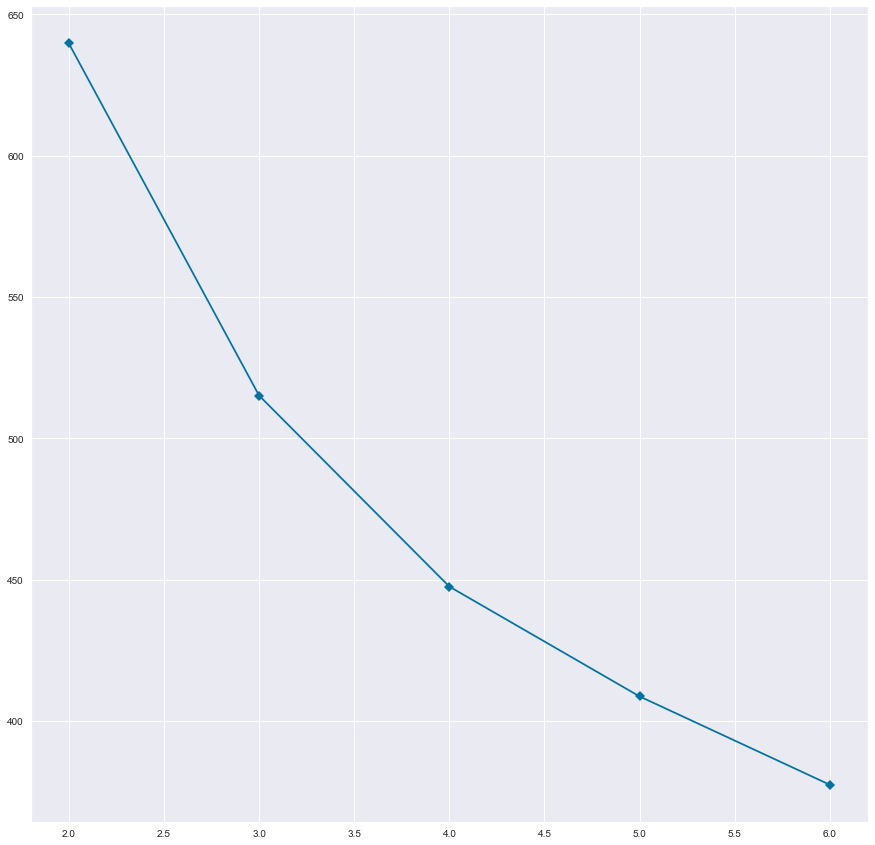

In [36]:
#identification du nombre des composants 6
from yellowbrick.cluster import KElbowVisualizer
coude = KElbowVisualizer(res,k=6,metric='distortion',timings=False)
#calculs
coude.fit(Z)

k=3 c'est à dire qu'il y a  3 facteurs significatifs ( variables sythéntiques qu'il faut prendre en compte )
la « méthode du coude » qui consiste à repérer l’endroit à partir duquel le pourcentage d’inertie diminue beaucoup plus lentement lorsque l’on parcourt le diagramme des éboulis de gauche à droite.

### analyse de l'éboulis des valeurs propres 

In [37]:
#clustering en 2 classes
resBis = cluster.KMeans(n_clusters=2)
resBis.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
#ici je vais choisir les variables que j'ai jugé utile
for idx,column in enumerate(Billet.columns):
       print(idx,column)

0 Authentique
1 Diagonale
2 hauteur_G
3 hauteur_D
4 marge_bas
5 marge_h
6 longueur


In [39]:
#création de dataframe avec les variables de mon choix 
Billets=Billet.iloc[:,[1,2,3,4,5,6]]
Billets

,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78
166,173.01,104.59,104.31,5.04,3.05,110.91
167,172.47,104.27,104.10,4.88,3.33,110.68
168,171.82,103.97,103.88,4.73,3.55,111.87


In [40]:
#instanciation
sc= StandardScaler()

In [41]:
#transformation – centrage-réduction
Z = sc.fit_transform(Billet)
print(Z)

[[ 0.83666003 -0.42834385  2.6694537  ... -0.13159013 -1.18987367
   0.28163308]
 [ 0.83666003 -0.88755932 -1.09769709 ... -0.86012554 -1.27473985
   0.78069736]
 [ 0.83666003 -0.36274164 -1.03042654 ... -0.30301023 -1.23230676
   1.37740465]
 ...
 [-1.19522861  1.73652911  0.68497248 ...  0.38267015  0.67718214
  -2.05094997]
 [-1.19522861 -0.39554274 -0.32408577 ...  0.16839504  1.61071005
  -0.75989238]
 [-1.19522861  0.06367273 -0.22317994 ...  1.45404575  0.38015054
  -1.74717171]]


In [42]:
#instanciation
acp = PCA(svd_solver='full')

In [43]:
coord = acp.fit_transform(Z)

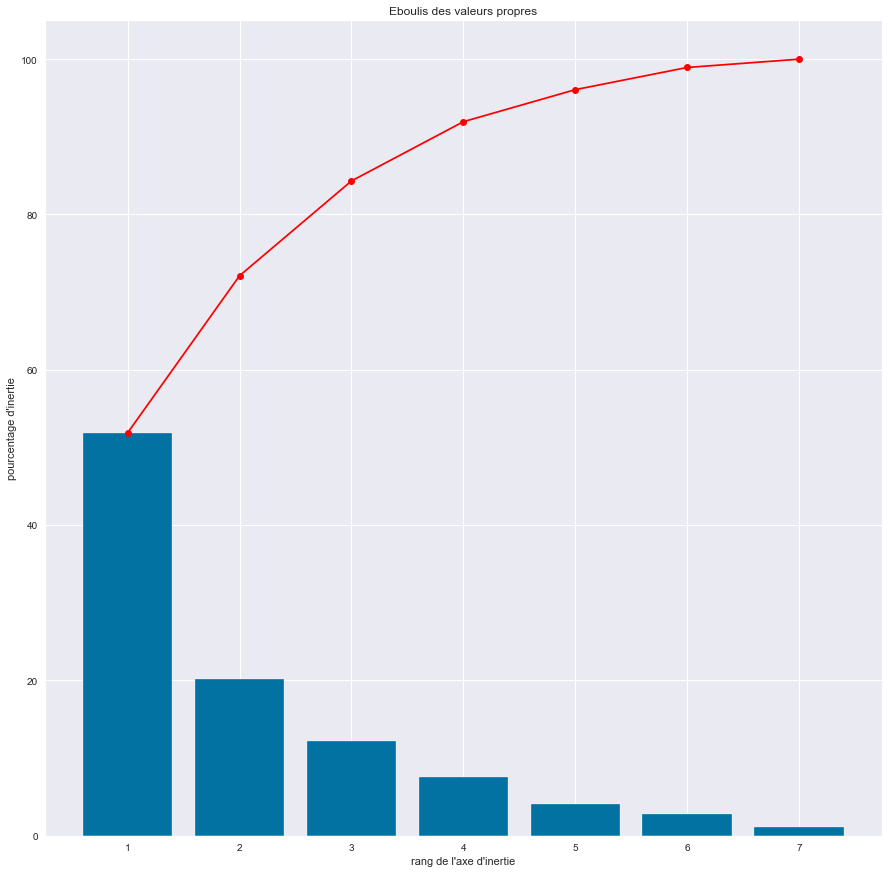

In [44]:
# Eboulis des valeurs propres
display_scree_plot(acp)
plt.show()

In [45]:
# Inertie cumulées des axes factoriels
acp.explained_variance_ratio_.cumsum()

array([0.51888755, 0.72115944, 0.84321376, 0.91949526, 0.96074863,
       0.98932325, 1.        ])

le premier plan factoriel contient 72 % d'informations explicatives

### représentation des variables par le cercle des corrélations 

In [46]:
n_comp=6

In [47]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca =Billet[['Diagonale', 'hauteur_G', 'hauteur_D', 'marge_bas', 'marge_h','longueur']]

In [48]:
# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names=Billet["Authentique"] #pour avoir les intitulés

In [49]:
features = Billets.columns
features

Index(['Diagonale', 'hauteur_G', 'hauteur_D', 'marge_bas', 'marge_h',
       'longueur'],
      dtype='object')

In [50]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [51]:
# Calcul des composantes principales
acp = decomposition.PCA(n_components=n_comp)
acp.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

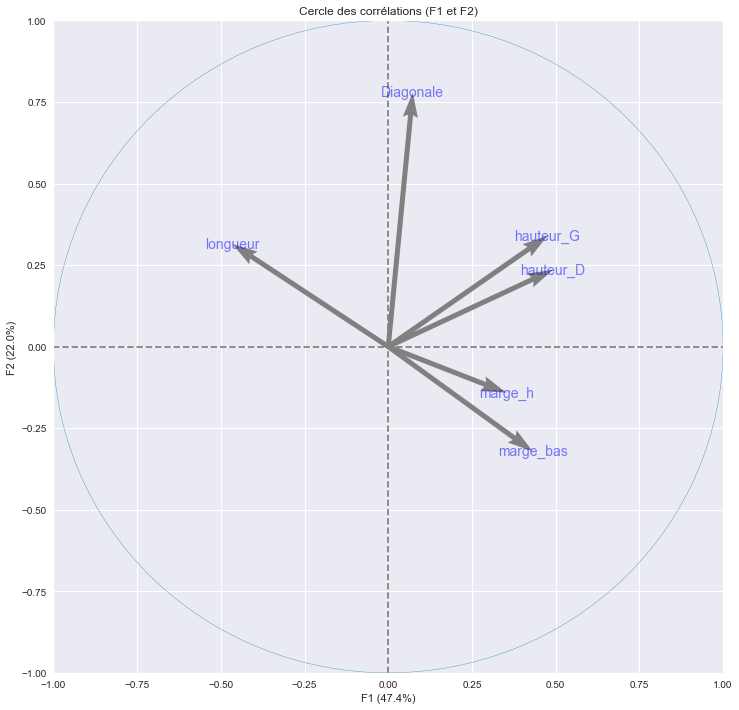

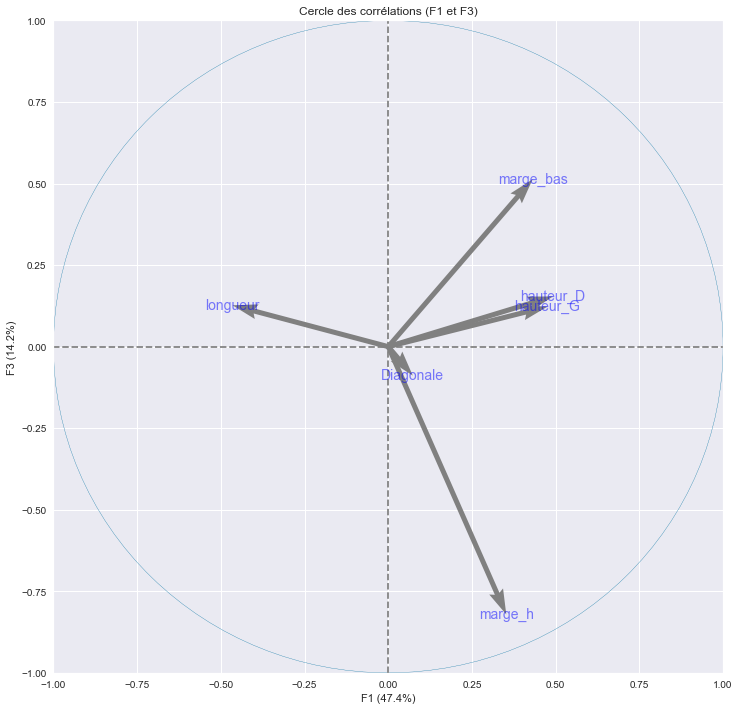

In [52]:
# Cercle des corrélations
plt.rcParams['figure.figsize'] = [18, 12]
pcs = acp.components_
display_circles(pcs, n_comp, acp, [(0,1),(0,2)],labels = np.array(features))

### représentation des individus par les plans factoriels

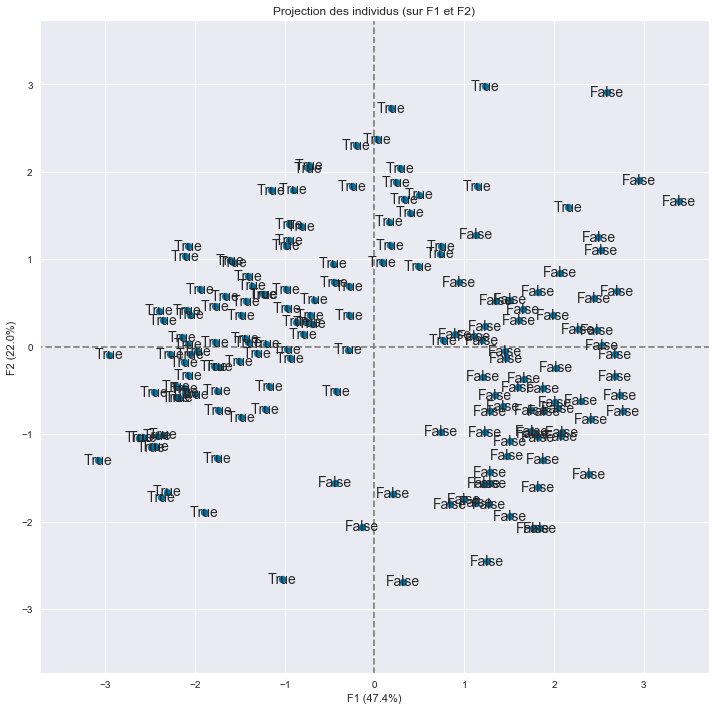

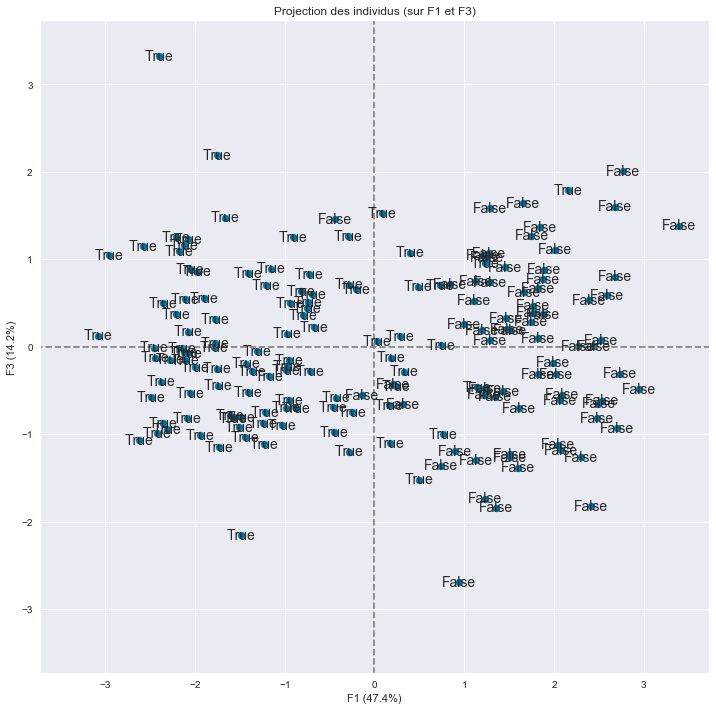

In [53]:
# Projection des individus pour la 1 ere plan factoriel
X_projected = acp.transform(X_scaled)
display_factorial_planes(X_projected, n_comp,acp,[(0,1),(0,2)],labels = np.array(names))
plt.show()

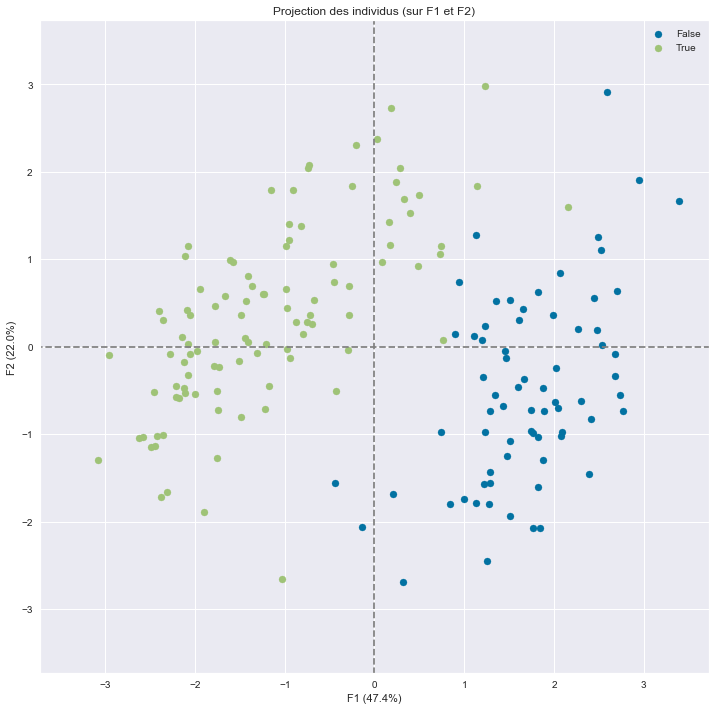

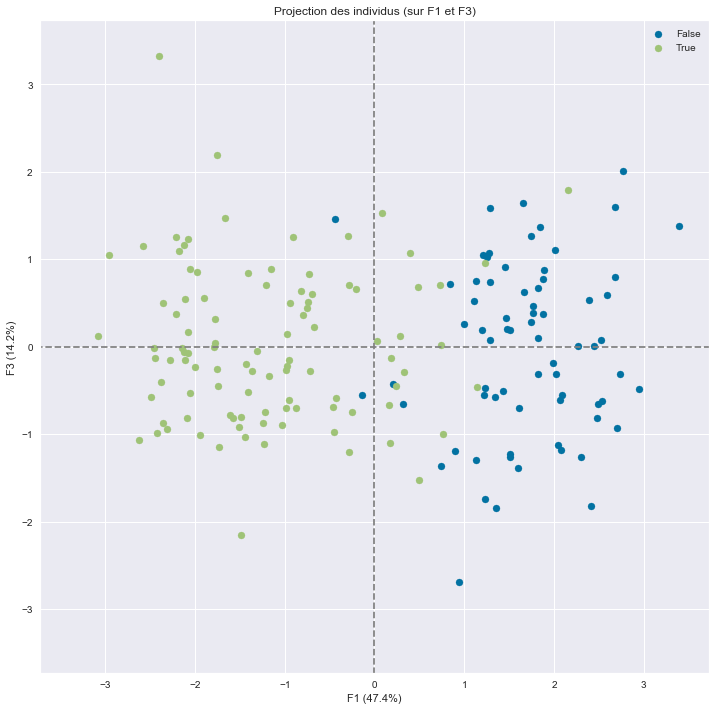

In [54]:
# Projection des individus
X_projected = acp.transform(X_scaled)#ici
display_factorial_planes(X_projected, n_comp,acp,[(0,1),(0,2)], illustrative_var=Billet['Authentique'])

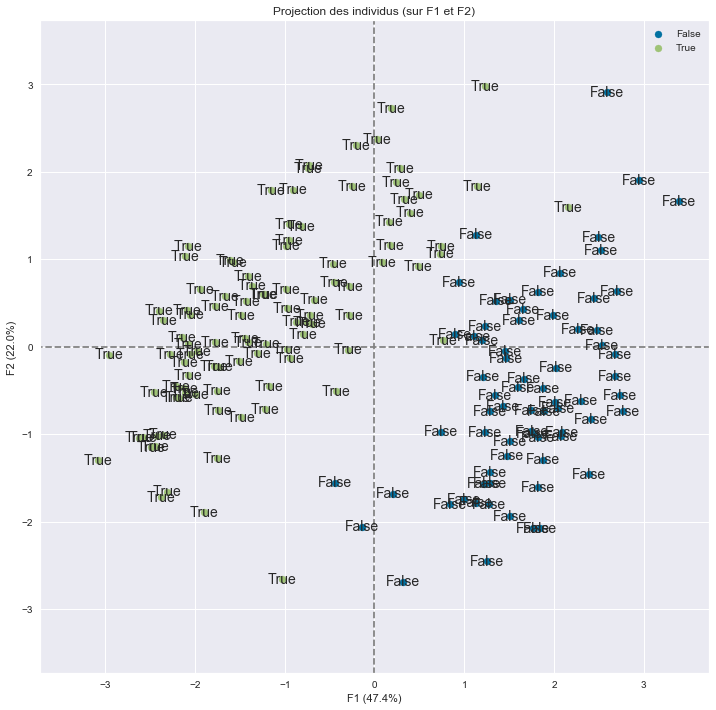

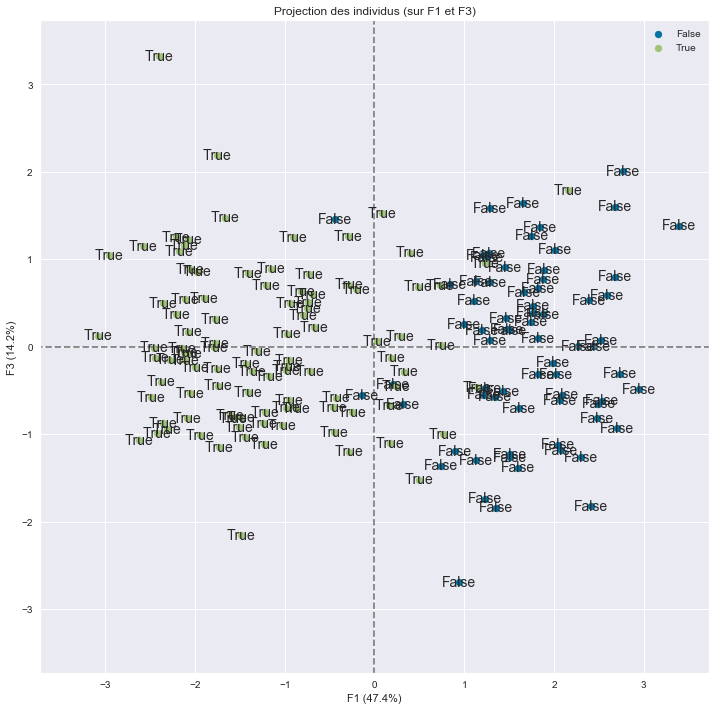

In [55]:
X_projected = acp.transform(X_scaled)
display_factorial_planes(X_projected, n_comp,acp,[(0,1),(0,2)],labels = np.array(names),illustrative_var=names)
plt.show()

### analyser de la qualité de représentation et la contribution des individus

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale

In [56]:
#contribution des individus dans l'inertie totale
p=6
di = np.sum(Z**2,axis=1)
pr=(pd.DataFrame({'ID':names,'d_i':di}))
pr.sort_values(by=['d_i'] ,ascending = False )

,ID,d_i
166,False,22.054222
0,True,19.110598
4,True,18.739567
122,False,18.219515
112,False,15.850978
...,...,...
59,True,2.184454
76,True,2.135202
85,True,2.131664
98,True,1.578319


Concrètement, True(19.11) et False (22.05) sont les deux billets qui se démarquent
le plus des autres, et on les retrouve aux deux extrémités du premier axe factoriel qui porte
72 % de l’information disponible.

Notre dataframe BB nous servira à observer les répercussions qu'on a sur notre ACP en supprimant certains billets qu'on aura détecté avec la qualité de représentations des individus. 

In [57]:
BB=Billet.copy()
BB.sort_index()

,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [58]:
BB=BB.drop(BB.index[11])

In [59]:
BB.head(n=12)

,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
5,True,172.57,104.65,104.44,4.54,2.99,113.16
6,True,172.38,103.55,103.80,3.97,2.90,113.30
7,True,171.58,103.65,103.37,3.54,3.19,113.38
8,True,171.96,103.51,103.75,4.06,3.33,113.53
9,True,172.14,104.34,104.20,4.63,3.02,112.47


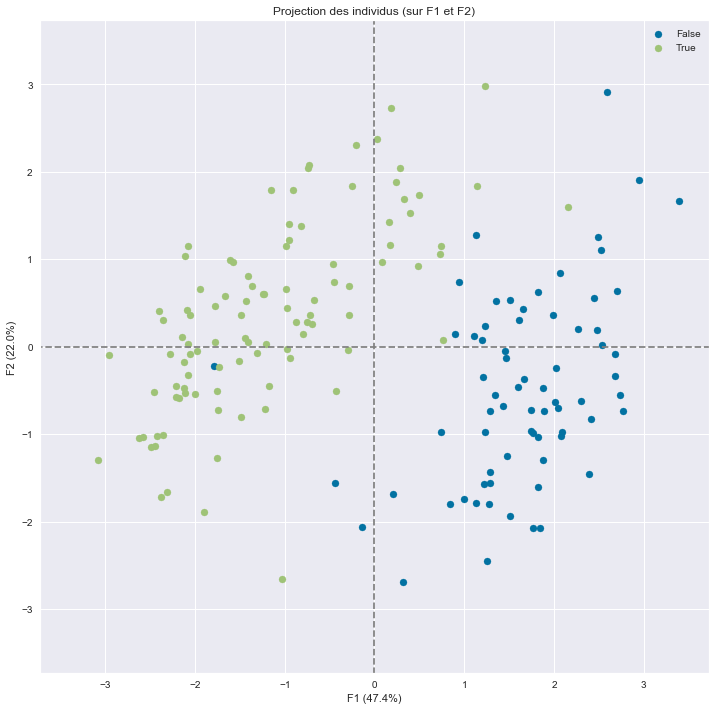

In [60]:
# Projection des individus
X_projected = acp.transform(X_scaled)#ici
display_factorial_planes(X_projected, n_comp,acp,[(0,1)], illustrative_var=BB['Authentique'])

In [61]:
#nombre de variables
p=Billet.shape[1]
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di 
PZ=(pd.DataFrame({'id':Billet['Authentique'],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}).sort_values(by='COS2_1'))
PZ.sort_values(by='COS2_2')

,id,COS2_1,COS2_2
146,False,0.877409,6.957188e-07
16,True,0.457139,5.839969e-06
47,True,0.605996,6.901748e-05
4,True,0.341009,1.242965e-04
124,False,0.571790,3.948898e-04
...,...,...,...
156,False,0.130337,8.206456e-01
34,True,0.023620,8.596451e-01
21,True,0.051344,8.921882e-01
5,True,0.012935,8.963001e-01


Conformément à la théorie, pour chaque individu, la somme des COS² sur l’ensemble des
facteurs est égale à 1.

In [62]:
#Ici on observe que le billet 96 est mal représenté et qu'il pourrait "un peu fosser" la #distinction visuelle vrai et faux 
BB=BB.drop(BB.index[96])#donc on va le supprimer 

In [63]:
print(pd.DataFrame({'id':Billet['Authentique'],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}).sort_values(by='COS2_2'))

        id    COS2_1        COS2_2
146  False  0.877409  6.957188e-07
16    True  0.457139  5.839969e-06
47    True  0.605996  6.901748e-05
4     True  0.341009  1.242965e-04
124  False  0.571790  3.948898e-04
..     ...       ...           ...
156  False  0.130337  8.206456e-01
34    True  0.023620  8.596451e-01
21    True  0.051344  8.921882e-01
5     True  0.012935  8.963001e-01
33    True  0.021132  8.980880e-01

[170 rows x 3 columns]


Après avoir supprimé ce billet et lorsqu'on visualise de nouveau notre ACP mais cette fois ci avec le dataframe BB on s'apercoit que le billet qui avait une valeur très petite ne se comportait pas comme son groupe. 

# Mission 3

## Classification avec K-means

In [64]:
Billet.columns

Index(['Authentique', 'Diagonale', 'hauteur_G', 'hauteur_D', 'marge_bas',
       'marge_h', 'longueur'],
      dtype='object')

In [65]:
# Nombre de clusters souhaités
n_clust = 2
# import de l'échantillon
data =Billet[['Authentique', 'Diagonale', 'hauteur_G', 'hauteur_D', 'marge_bas','marge_h', 'longueur']]
# préparation des données pour le clustering
X = data.values
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

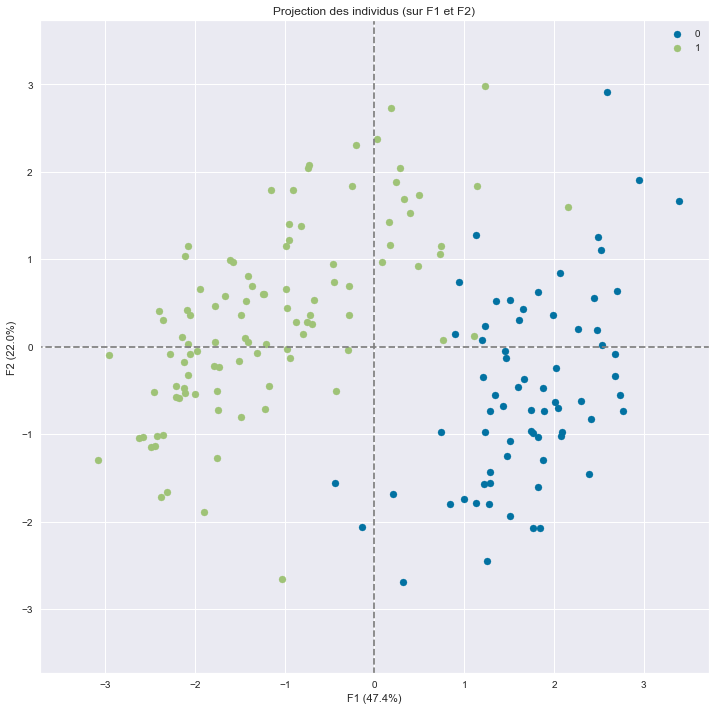

In [66]:
display_factorial_planes(X_projected, n_comp, acp,[(0,1)],illustrative_var= np.array(clusters))
plt.show()

In [67]:
# les centroides
pd.crosstab(clusters,Billet["Authentique"])

Authentique,False,True
row_0,,
0,69,0
1,1,100


In [68]:
#matrice de confusion
print("Matrice de confusion")
bp = pd.crosstab(clusters,Billet["Authentique"])
bp.index = ['Cluster 1','Cluster 2']
bp.columns = ['Faux','Vrais']
bp

Matrice de confusion


,Faux,Vrais
Cluster 1,69,0
Cluster 2,1,100


# Mission 4

## Modélisation des données

In [69]:
print(Billet.info()); print()
Billet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Authentique  170 non-null    bool   
 1   Diagonale    170 non-null    float64
 2   hauteur_G    170 non-null    float64
 3   hauteur_D    170 non-null    float64
 4   marge_bas    170 non-null    float64
 5   marge_h      170 non-null    float64
 6   longueur     170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB
None



,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


Ces données contiennent les informations de 170 billets de banque. On y trouve des informations telles que :
- diagonale ;
- hauteur gauche et droite  ;
- marge haut et bas ;
- longueur .

La variable Authentique est la variable qui indique si le billet est authentique (True) ou pas (False).

## Visualisez le nuage de points

Pour étudier le fait d'avoir un vrai billet  en fonction de longueur, on peut visualiser le nuage de points :

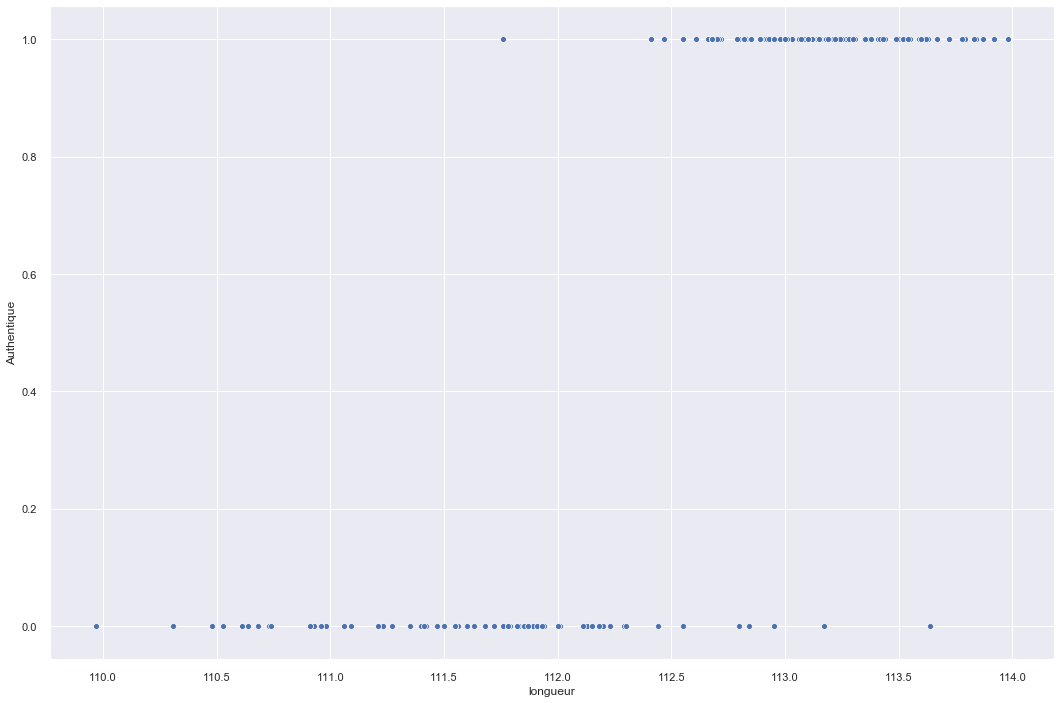

In [70]:
sns.set()
ax = sns.scatterplot(x="longueur", y="Authentique", data=Billet)
plt.savefig('Long_Auth')

 Il y a des 0 et des 1, mais on remarque que plus lalongeur est grand plus le faux billetssont rare

On voit également qu'une régression linéaire sur un tel nuage de points n'aurait aucun sens, car elle nous donnerait des valeurs qui ne seraient quasiment jamais sur 0 ni 1.



## Effectuez la régression logistique

Effectuons donc une régression logistique de Authentique en fonction des longueur,Diagonale

In [71]:
billets_data = Billet.loc[:, ('Diagonale', 'longueur')].values
billets_data_names = ['Diagonale', 'longueur']

In [72]:
y = Billet.loc[:, 'Authentique'].values

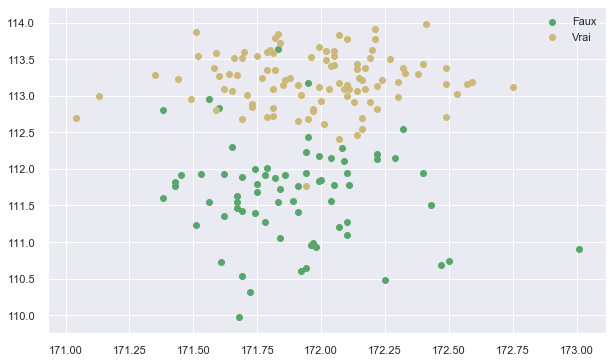

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(billets_data[y == 0][:, 0], billets_data[y == 0][:, 1], color='g', label='Faux')
plt.scatter(billets_data[y == 1][:, 0], billets_data[y == 1][:, 1], color='y', label='Vrai')
plt.legend();
plt.savefig('regression_logistique')

## Régression logistique bivariée

### Vérification de l'indépendance entre les caractéristiques

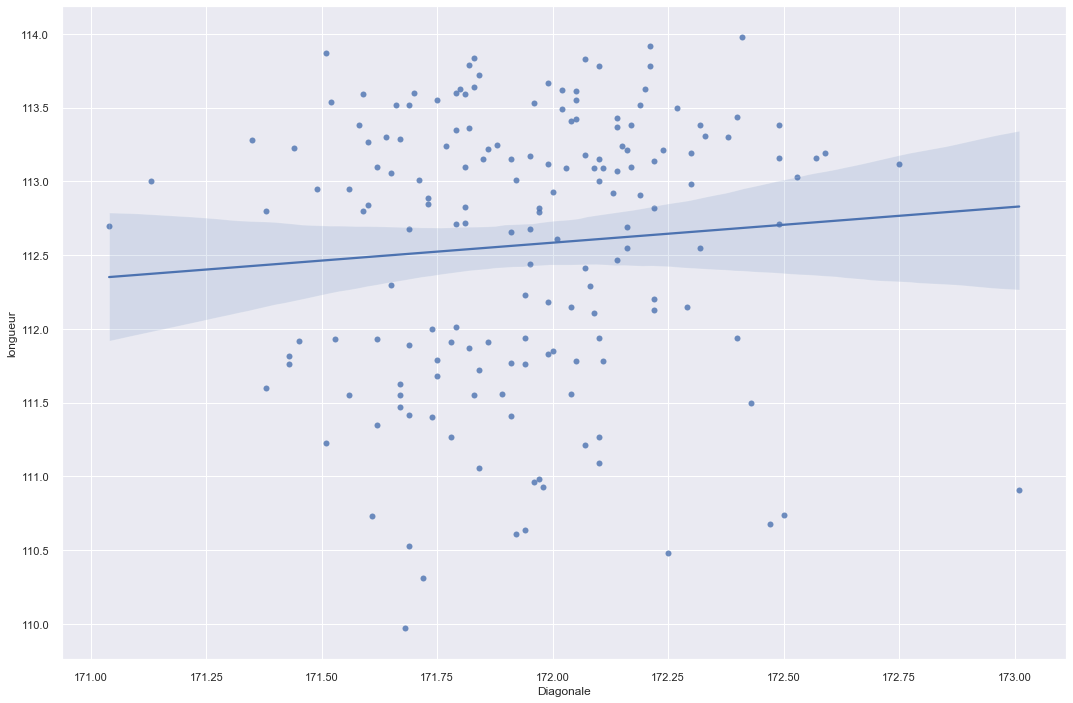

In [74]:
sns.regplot(x='Diagonale', y='longueur',data=Billet )
plt.show()

In [75]:
# calcule de coefficient de corrélation
diagonale = Billet["Diagonale"]
longueur= Billet["longueur"]
longueur_1 = longueur.copy()
spearmanr_coefficient, p_value = spearmanr(diagonale, longueur)
print('Spearmanr Rank Correlation Coefficient %0.3f' %(spearmanr_coefficient))

Spearmanr Rank Correlation Coefficient 0.130


=> Indépendantes car très peu corrélées entre elles.

### Vérification des valeurs manquantes

In [76]:
Billet.isnull().sum()

Authentique    0
Diagonale      0
hauteur_G      0
hauteur_D      0
marge_bas      0
marge_h        0
longueur       0
dtype: int64

### Vérifier que votre cible est binaire ou ordinale

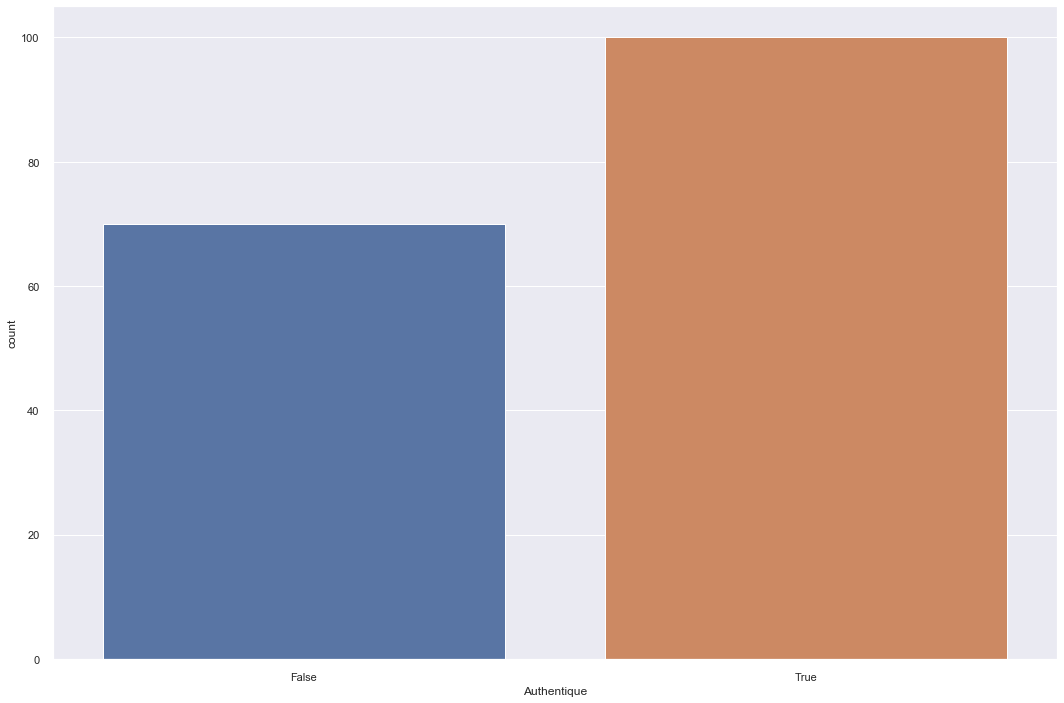

In [77]:
w = sns.countplot(x='Authentique', data=Billet)

### Vérifier que la taille de notre ensemble de données est suffisante

In [78]:
Billet.shape

(170, 7)

170 > 50 donc la taille est amplement suffisante.

### Déploiement et évaluation de notre modèle

In [79]:
#Régression logistique bivariée (longueur et diagonale).
X = billets_data
LogReg = LogisticRegression(solver="lbfgs")
LogReg.fit(X,y)
print(LogReg.score(X, y))

0.9294117647058824


la probabilité est de 93 % de bonne réponse

In [80]:
# prédiction de X
y_pred = LogReg.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.90      0.91        70
        True       0.93      0.95      0.94       100

    accuracy                           0.93       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.93      0.93      0.93       170



Très bons car les résultats tournent aux alentours de 93%.

In [81]:
# Prévisions: est-ce un billet de banque ou pas en fonction des données rentrées

pred_1 = LogReg.predict([[100, 100]]) # Diagonale, longueur
pred_2 = LogReg.predict([[180, 90]])
print(pred_1[0], pred_2[0])

True False


Comment améliorer ce modèle? Il faut que les variables explicatives soient indépendantes entre elles, mais la régression logistique ne marche pas très bien avec des variables indépendantes (X) non corrélées avec la variable target (y). Longueur est positivement corrélée avec Authentique (_r_ de Spearman = 0.797) ce qui n'est pas le cas de diagonal (_r_ de Spearman = 0.178). Il faudrait donc changer de variables indépendantes pour améliorer les prédictions et le score de ce modèle.

In [82]:
Billet.corr(method="spearman")

,Authentique,Diagonale,hauteur_G,hauteur_D,marge_bas,marge_h,longueur
Authentique,1.000000,0.178429,-0.485580,-0.584122,-0.777957,-0.594858,0.797434
Diagonale,0.178429,1.000000,0.302999,0.180187,-0.169554,-0.016456,0.129898
hauteur_G,-0.485580,0.302999,1.000000,0.748859,0.455647,0.345452,-0.458313
hauteur_D,-0.584122,0.180187,0.748859,1.000000,0.559357,0.389594,-0.452624
marge_bas,-0.777957,-0.169554,0.455647,0.559357,1.000000,0.161486,-0.610248
marge_h,-0.594858,-0.016456,0.345452,0.389594,0.161486,1.000000,-0.540730
longueur,0.797434,0.129898,-0.458313,-0.452624,-0.610248,-0.540730,1.000000


## Régression logistique simple

In [83]:
L = longueur_1[:, np.newaxis]
LogReg = LogisticRegression(solver="lbfgs")
LogReg.fit(L, y)
print(LogReg.score(L, y))

0.9529411764705882


Très bon score de 0.953.

In [84]:
y_pred = LogReg.predict(L)

In [85]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.91      0.94        70
        True       0.94      0.98      0.96       100

    accuracy                           0.95       170
   macro avg       0.96      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



Environ 95% de résultats pertinents, ce qui est très bien.

In [86]:
xs = np.linspace(L.min(), L.max())
xs = xs[:, np.newaxis]
LogReg.predict(xs)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [87]:
longueur = np.arange(109.9, 114.1, 0.1)
probabilities= []
for i in longueur:
    p_false, p_true = LogReg.predict_proba([[i]])[0]
    probabilities.append(p_true)

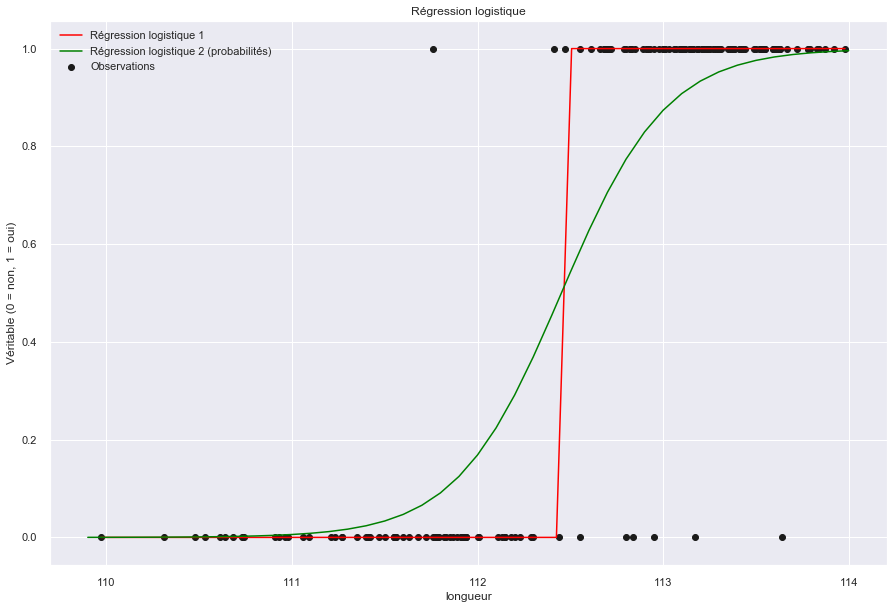

In [88]:
# la courbe sigmoïde
plt.figure(figsize=(15,10))
plt.scatter(L, y, color = 'k', label="Observations")
plt.plot(xs, LogReg.predict(xs), color='red', label="Régression logistique 1")
plt.plot(longueur, probabilities, color='green', label="Régression logistique 2 (probabilités)")
plt.xlabel("longueur")
plt.ylabel("Véritable (0 = non, 1 = oui)")
plt.title("Régression logistique")
plt.savefig("Régression logistique")
plt.legend()
plt.show()

In [89]:
pred_a = LogReg.predict([[110]])
pred_b = LogReg.predict([[116]])
print(pred_a[0], pred_b[0])

False True


Un billet de banque est considéré comme véritable si sa longueur est d'environ 112.5mm (à partir de). Avant cette valeur, le modèle prédit qu'un billet de banque n'est pas véritable.

J'ai sélectionné la variable la plus corrélée avec la target, donc longueur. Cependant, ce modèle n'utilise qu'une seule variable indépendante (L). 

## Régression logistique 

Modélisez les données à l'aide d'une régression logistique. Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [90]:
Billet.columns # colonnes de dataframe

Index(['Authentique', 'Diagonale', 'hauteur_G', 'hauteur_D', 'marge_bas',
       'marge_h', 'longueur'],
      dtype='object')

In [91]:
X = Billet.drop(['Authentique'], axis=1).values
y = Billet['Authentique']

logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
probabilites = logistic.predict_proba(X)

In [93]:
probabilites #1ère colonne proba que ce soit faux, 2ème colonne vrai

array([[3.62892777e-01, 6.37107223e-01],
       [6.23323622e-03, 9.93766764e-01],
       [6.40268733e-03, 9.93597313e-01],
       [1.97000004e-03, 9.98030000e-01],
       [3.02644603e-02, 9.69735540e-01],
       [1.87932261e-01, 8.12067739e-01],
       [7.35951380e-03, 9.92640486e-01],
       [1.42519095e-03, 9.98574809e-01],
       [8.62385983e-03, 9.91376140e-01],
       [4.47028734e-01, 5.52971266e-01],
       [2.18826056e-02, 9.78117394e-01],
       [2.13994681e-03, 9.97860053e-01],
       [4.85277259e-02, 9.51472274e-01],
       [6.18280508e-03, 9.93817195e-01],
       [6.48319310e-03, 9.93516807e-01],
       [2.46391540e-02, 9.75360846e-01],
       [8.23994303e-03, 9.91760057e-01],
       [2.06189722e-02, 9.79381028e-01],
       [6.13729324e-03, 9.93862707e-01],
       [1.32074763e-02, 9.86792524e-01],
       [2.35721662e-02, 9.76427834e-01],
       [3.63144427e-02, 9.63685557e-01],
       [5.00806591e-02, 9.49919341e-01],
       [7.72770477e-02, 9.22722952e-01],
       [1.250387

In [94]:
logistic.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [95]:
logistic.coef_ #les coeff de notre équation

array([[-0.37117129, -0.57990484, -1.04335572, -2.83568573, -1.50981796,
         2.2320178 ]])

In [96]:
logistic.intercept_ #coeff supplémentaire 

array([-0.01511989])

In [97]:
logistic.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [98]:
Billet['prediction']=logistic.predict(X)

In [99]:
Op=pd.crosstab(Billet['Authentique'],Billet['prediction'])
Op

prediction,False,True
Authentique,,
False,69,1
True,1,99


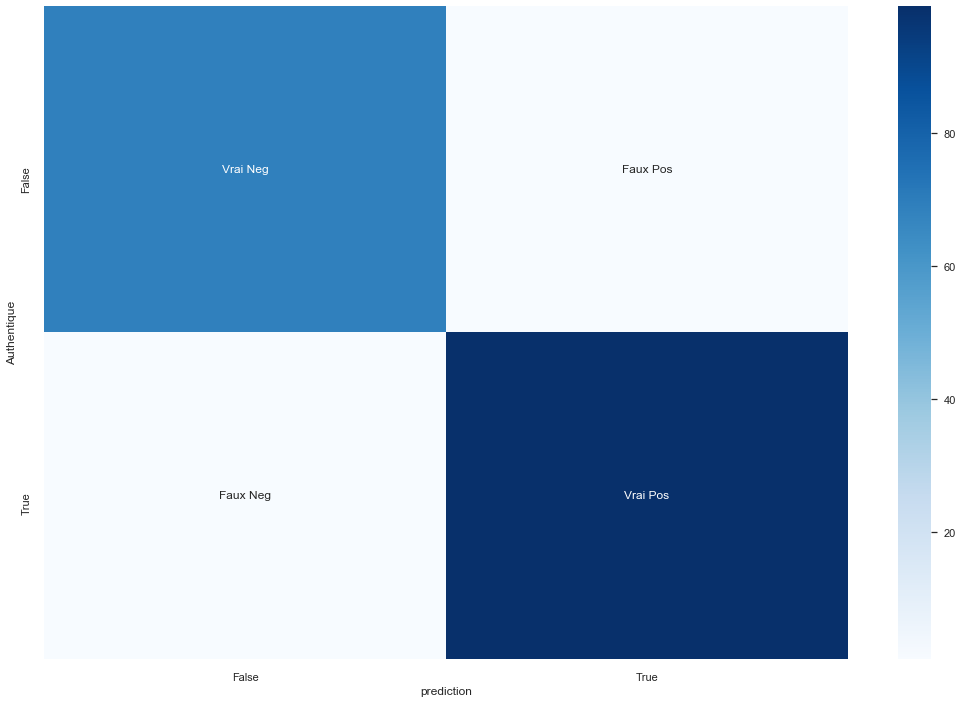

In [100]:
#graphique vrai et faux positifs
#sns.heatmap(Op, annot=True, cmap='Blues')
labels = ['Vrai Neg','Faux Pos','Faux Neg','Vrai Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Op, annot=labels, fmt='', cmap='Blues')

In [101]:
(2/170)#taux d'erreur 

0.011764705882352941

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(Billet['Authentique'],Billet['prediction'])#performance du modele good

0.9882352941176471

## Train test split

In [103]:
Billet.columns

Index(['Authentique', 'Diagonale', 'hauteur_G', 'hauteur_D', 'marge_bas',
       'marge_h', 'longueur', 'prediction'],
      dtype='object')

In [104]:
#train_test_split
X = Billet.drop(['Authentique','prediction'],axis=1).values   # independant features
y = Billet['Authentique'].values # dependant variable

#on va choisir la taille de notre test pour répartir les ensembles de formation et de test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
print("Train set :",X_train.shape)
print("Test set :",X_test.shape)

Train set : (136, 6)
Test set : (34, 6)


In [105]:
#Modélisation du modèle
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Validation Set

In [106]:
Model=KNeighborsClassifier(n_neighbors=6)
Model.fit(X_train,y_train)
print(('probla_train:',Model.score(X_train,y_train)))
print(('probla_test:',Model.score(X_test,y_test)))

('probla_train:', 0.9926470588235294)
('probla_test:', 1.0)


Text(0.5, 1.0, 'Test set')

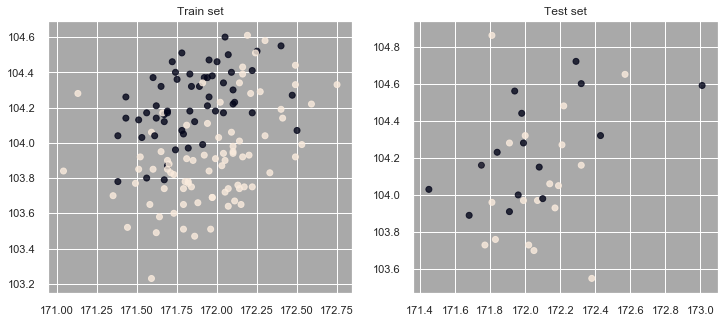

In [107]:
plt.rcParams['axes.facecolor'] = 'darkGrey'
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=0.8)
plt.title('Test set')

### Validation curve

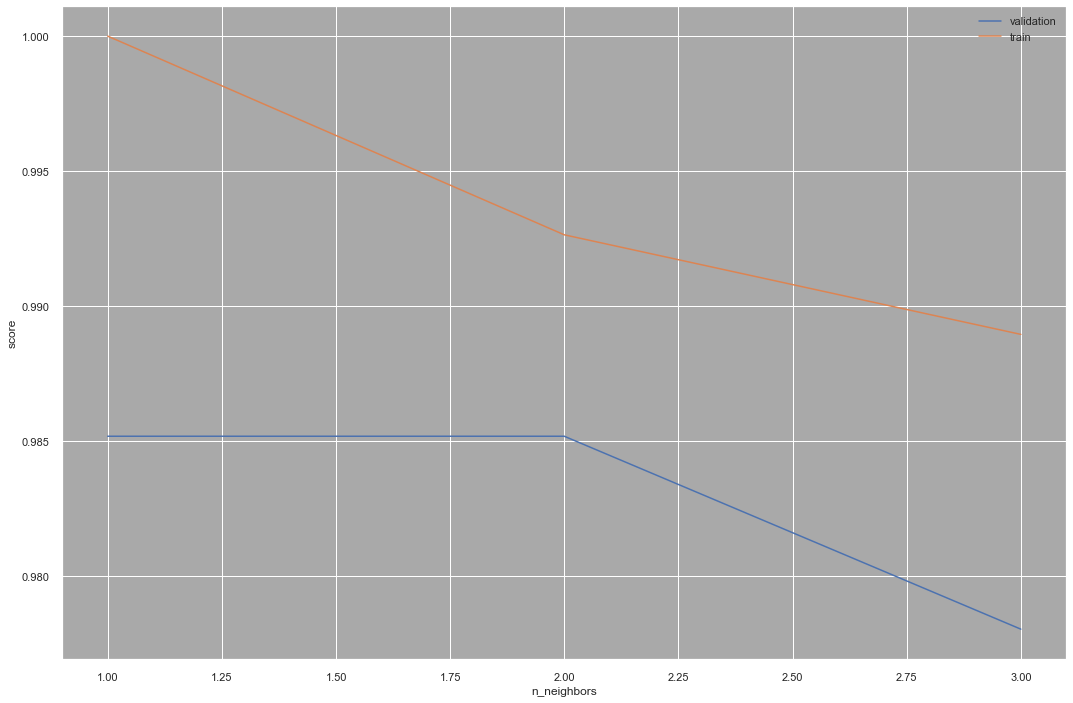

In [108]:
model=KNeighborsClassifier()
k=np.arange(1,4)
train_score,val_score=validation_curve(model,X_train,y_train,'n_neighbors',k,cv=5)
plt.plot(k,val_score.mean(axis=1),label='validation')
plt.plot(k,train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

## Test 

In [109]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator, step=1)
selector = selector.fit(X_train, y_train)
selector.support_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([False, False,  True,  True, False,  True])

In [116]:
#example=pd.read_csv("example.csv")
example=pd.read_csv("test_notes_P6.csv")
example

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [117]:
X = example.drop(['id'], axis=1).values

In [118]:
probabilites = selector.predict(X)

In [119]:
probabilites

array([ True, False,  True, False, False])

In [120]:
print(pd.DataFrame({'ID':example['id'],'Nature':probabilites}))

    ID  Nature
0  B_1    True
1  B_2   False
2  B_3    True
3  B_4   False
4  B_5   False


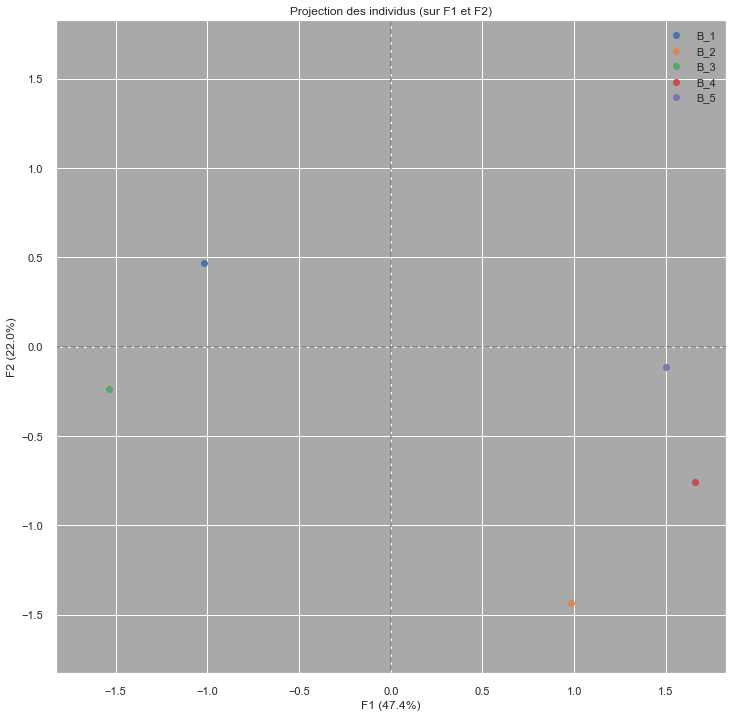

In [121]:
X_scaled = std_scale.transform(X)#ici
X_projected = acp.transform(X_scaled)#ici
display_factorial_planes(X_projected, n_comp, acp, [(0,1)], illustrative_var=example['id'])